# ENG2006 Coursework 2

## Instructions

This assignment carries 50\% of the module mark. Completed work should be submitted via eBART by **12 noon on Friday 29/04/2022**.

#### Asnswering the questions

When answering the questions please keep the following in mind:

+ Your submission should consist of the **present notebook and the imageModel folder created in Question 2 only**, any other files will not be taken into consideration.
+ Each question should be answered in the cell directly after its description. **New cells should not be added to the notebook**.
+ Your questions should consist exclusively of code with comments where necessary.
+ **You should not use any `input` commands**.
+ Whenever requested, **you should use the variable names specified in the description**.

#### Testing your answers

This notebook contains some automated tests, which you can run to test your answers before submission. To do this:

+ Once you have completed each question and executed the corresponding cell, execute the cell directly after it:
    - If your answer passes the tests, a message will appear.
    - If not, an error will be trigered. At the very end of the error message, there will be a possible explanation for why the test failed.
+ Once you have completed all questions, select the option Restart & Run All from the Kernel menu to ensure that all tests can still be pased.

If your answers can pass all the tests and your results seem reasonable, your notebook should be ready for submission. However you should keep in mind that:

+ The tests mainly check that the correct variables are created, and only to a limited extent the validity of the results.
+ Passing the tests does not guarantee the correctness of your solution.
+ Additional tests will be performed after submission.
+ As a result, passing the tests for a specific task does not guarantee that you will be awarded all of the corresponding marks.

#### Submitting your coursework

As mentioned above, your coursework for the python part should consist of the present notebook and the imageModel folder to be created in Question 2 only. Once you have answered all of the questions and tested your answers, save the notebook and add it to a .zip file. **Do not include** the `casting_data` folder provided with the notebook.

## Question 1 [50 marks]

<br />
<br />

<div>
<img src="points.png" width="500" align="center">
</div>

The provided `points.txt` and `labels.txt` files contain coordinates and labels for a set of points in the 2D plane, divided in classes as shown above. Follow the steps below to train a neural network to classify these points:

### Question 1-a [5 marks]

Read the points and labels and plot them with different colors for each class. Store the points in a numpy array named `points` and the labels in an array named `pointLabels`.

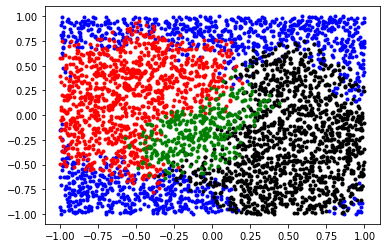

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#load points and labels into np arrays
points = np.loadtxt("points.txt")
pointLabels = np.loadtxt("labels.txt")

#classify the points by their labels
class0 = np.argwhere(pointLabels==0)
class1 = np.argwhere(pointLabels==1)
class2 = np.argwhere(pointLabels==2)
class3 = np.argwhere(pointLabels==3)

#plot classes using different colors
plt.plot(points[class0,0],points[class0,1],'.b')
plt.plot(points[class1,0],points[class1,1],'.r')
plt.plot(points[class2,0],points[class2,1],'.k')
plt.plot(points[class3,0],points[class3,1],'.g')

plt.show()



In [3]:
#Run this cell to test your answer for Question 1-a
# from tests import question1a

# question1a(points,pointLabels)

### Question 1-b [5 marks]

Divide the data set into three parts by performing:

+ A 50-50 split of the original data resulting in a test set consisting of 50% of the original points. Store the points and labels for the test set in variables named `pointsTest` and `pointLabelsTest` respectively.
+ A 80-20 split of the remaining data resulting in:
    + A training set consisting of 40% of the original data. Store the points and labels for the training set in variables named `pointsTrain` and `pointLabelsTrain` respectively.
    + A validation set consisting of 10% of the original data. Store the points and labels for the validation set in variables named `pointsVal` and `pointLabelsVal` respectively.

In [4]:
from sklearn.model_selection import train_test_split

#split 50 50 test train data
pointsTest, pointsTrain, pointLabelsTest, pointLabelsTrain = train_test_split(points, pointLabels, train_size=0.5)

#further split train data 80 20 train val
pointsTrain, pointsVal, pointLabelsTrain, pointLabelsVal = train_test_split(pointsTrain, pointLabelsTrain, train_size=0.8)


In [5]:
#Run this cell to test your answer for Question 1-b
# from tests import question1b

# question1b(pointsTrain,pointsVal,pointsTest,pointLabelsTrain,pointLabelsVal,pointLabelsTest)

### Question 1-c [30 marks]

Using tensorflow, train a feedforward neural network to classify the points using hyperparemeter tuning and early stopping. More specifically, your training code should:

+ Consider networks with 1,2 and 4 hidden layers with ReLU activation.
+ Consider networks with 64, 128, 256 and 512 hidden units in each layer.
+ Train using the Adam optimiser with categorical sparse cross entropy and stop if the loss for the validation set does not improve for more than 5 consecutive iterations.
+ Save the network that achieves the best performance, along with the corresponding loss and accuracy for the validation set, number of hidden layers and number of hidden units.

The final model created by the above process should be named `modelOpt`. Similarly, the corresponding loss and accuracy for the validation set, number of hidden layers and number of hidden units should be named `lossValOpt`, `accValOpt`, `layersOpt` and `unitsOpt` respectively.

In [6]:
import tensorflow as tf
from livelossplot import PlotLossesKeras

#units and layers hyperparameters
hiddenUnits = [64, 128, 256, 512]
hiddenLayers = [1, 2, 4]

earlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)

for layers in hiddenLayers:    
    for units in hiddenUnits:
        #create model
        model = tf.keras.Sequential()

        #add specified number of layers
        for i in range(0, layers, 1):
            model.add(tf.keras.layers.Dense(units,
                                        activation = 'relu'))

        #add final dense layer with softmax activation
        model.add(tf.keras.layers.Dense(4,
                                        activation = 'softmax'))

        #compile and fit model for training set
        model.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    metrics='accuracy')
    
        model.fit(pointsTrain, 
                pointLabelsTrain,
                validation_data=(pointsVal, pointLabelsVal),
                callbacks=[earlyStoppingCallback], 
                epochs=1000)
        
        #evaluate model for validation set
        lossVal, accVal = model.evaluate(pointsVal, pointLabelsVal)
        
        if units==hiddenUnits[0]:
            #if this is the first model tested, save model, error, and accuracy
            modelOpt = model
            lossOpt = lossVal
            accOpt = accVal
            unitsOpt = units
            layersOpt = layers
        else:
            #for every subsequent model check accuracy, if higher than current optimal model then replace optimal
            if accVal>accOpt:
                modelOpt = model
                lossOpt = lossVal
                accOpt = accVal
                unitsOpt = units
                layersOpt = layers

print(lossOpt, accOpt, unitsOpt, layersOpt)


Epoch 1/1000
50/50 [==============================] - 1s 7ms/step - loss: 1.2255 - accuracy: 0.5412 - val_loss: 1.0858 - val_accuracy: 0.7325
Epoch 2/1000
50/50 [==============================] - 0s 3ms/step - loss: 1.0132 - accuracy: 0.6938 - val_loss: 0.8983 - val_accuracy: 0.7475
Epoch 3/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.8740 - accuracy: 0.7000 - val_loss: 0.7845 - val_accuracy: 0.7525
Epoch 4/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7907 - accuracy: 0.7175 - val_loss: 0.7151 - val_accuracy: 0.7475
Epoch 5/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7353 - accuracy: 0.7219 - val_loss: 0.6691 - val_accuracy: 0.7525
Epoch 6/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.7200 - val_loss: 0.6328 - val_accuracy: 0.7525
Epoch 7/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6641 - accuracy: 0.7244 - val_loss: 0.6048 - val_accuracy: 0.7625
Epoch 

In [7]:
#Run this cell to test your answer for Question 1-c
#from tests import question1c

#question1c(layersOpt,unitsOpt,lossOpt,accOpt,modelOpt,lossVal,accVal,pointsVal,pointLabelsVal)

### Question 1-d [5 marks]

Evaluate the accuracy and loss of the trained model for the test set and store them in variables named `accTest` and `lossTest` respectively. Then, create and plot the confusion matrix for the test set. Store the matrix as well as the corresponding display object in variables named `pointsConfusionMatrix` and `pointsConfusionMatrixPlot` respectively.

63/63 [==============================] - 0s 1ms/step - loss: 0.2929 - accuracy: 0.8705


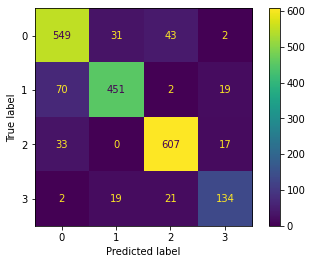

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #import confusion matrix related classes

#evalute acc and loss for optimal model
lossTest, accTest = modelOpt.evaluate(pointsTest,  pointLabelsTest)

#predict labels with the optimal model 
labelsPred = modelOpt.predict(pointsTest)
labelsPred = np.argmax(labelsPred,axis=1)

#create confusion matrix with test and predicted data
pointsConfusionMatrix = confusion_matrix(pointLabelsTest, labelsPred)

#plot confusion matrix
pointsConfusionMatrixPlot = ConfusionMatrixDisplay(pointsConfusionMatrix)
pointsConfusionMatrixPlot.plot()

In [9]:
# #Run this cell to test your answer for Question 1-d
# from tests import question1d

# question1d(accTest,accOpt,lossTest,pointsConfusionMatrix,pointsConfusionMatrixPlot)

### Question 1-e [5 marks]

Using the function provided in lecture 2, create a contour plot of the decision boundary for the trained model.

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

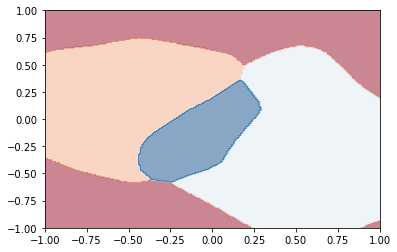

In [10]:
def plotDecisionBoundary(model,limx=[-1,1],limy=[-1,1],resolution=200, colormap = 'RdBu'):
    '''Function to plot the decision boundary of a tensorflow model as a contour plot.
       model is the model, which should have a predict method
       limx, limy are the limits of the plot in x and y
       resolution is the resolution of the plot in terms of the number of points used per direction
       colormap is the colormap to be used for the contour plot
       The function returns a figure and an axis object'''
    
    #create figure
    fig,ax = plt.subplots(1,1)
    
    #create linspaces with the x and y coordinates of the points to be used for the contour plot
    #the limits and resolution are set to the user provided values
    xPoints = np.linspace(limx[0], limx[1], resolution)
    yPoints = np.linspace(limy[0], limy[1], resolution)
    
    #create a meshgrid from the provided
    xx, yy = np.meshgrid(xPoints, yPoints)
    
    #use model to predict the labels of the generated points
    #ravel and c_ are used to bring the coordinates in the correct shape
    modelPred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    #check shape of the output, if the output is twodimensional and the size in the second dimension is more than 1
    #then the ouput is assumed to be provided in terms of probabilities and is converted to class indices using the argmax function
    if len(modelPred.shape)==2 and modelPred.shape[1]!=1:
        modelPred = np.argmax(modelPred,axis=1)
    else:
    #if the output is either onedimensional or the second dimension has size one, 
    #then it is assumed to be labels for binary classification and a 0.5 threshold is applied to convert to binary format
        modelPred = modelPred>0.5
    
    #reshape the labels to the shape of xx and yy so that they can be used for a contour plot
    z = modelPred.reshape(xx.shape)

    #create contour plot
    ax.contourf(xx,yy,z,cmap=colormap,alpha=0.5)
    
    #return figure and axis
    return fig,ax

plotDecisionBoundary(modelOpt)

## Question 2 [50 marks]

<br />
<br />

<div>
<img src="components.png" width="600" align="center">
</div>

The accompanying `casting_data` folder contains images of defective and pristine cast components downloaded from [kaggle](https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product). The dataset is already split into training and testing parts, stored in the corresponding folders (`train` and `test` respectively). Within each folder, two folders can be found containing images of the defective and pristine components (`def_front` and `ok_front` respectively).

### Question 2-a [5 marks]

Using the function provided in lecture 3, read the files as grayscale images and plot one image from each set. Store the images and the labels in variables named `imagesTrain`, `imageLabelsTrain`,`imagesTest`, `imageLabelsTest` respectively.

Loading folder:  def_front
Loading folder:  ok_front
Loading folder:  def_front
Loading folder:  ok_front


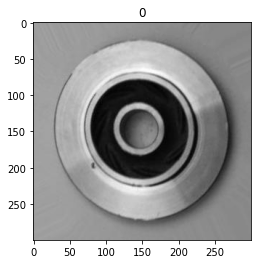

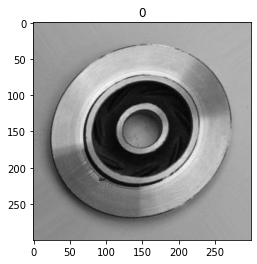

In [2]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

def loadImageFiles(path, filesPerClass=0, colorFlag=cv2.IMREAD_UNCHANGED):
    """Function to load load images from athe provided path directory. 
       It is assumed that, within the directory, different folders will
       contain images from different classes. The optional argument filesPerClass
       can be used to select a subset of the total data from each class,
       if the default value of 0 is used, then all the available files are loaded.
       The optional argument colorFlag specifies how the files should be loaded, the default option is
       cv2.IMREAD_UNCHANGED, which will not change the type of the file, but the options
       cv2.IMREAD_COLOR and cv2.IMREAD_GRAYSCALE can also be used to read images as color and
       grayscale respectively.The function returns a numpy array whose first dimension corresponds to different images,
       and an array with the labels"""
    
    #initialise images and labels as empty lists
    images=[]
    labels=[]
    
    #initialise label counter to 0
    label=0
    
    #use os to find the names of all folders within the provided directory
    folders = os.listdir(path)
    
    #loop extracted folders
    for folder in folders:
        print('Loading folder: ', folder)
        
        #path to each folder
        folderPath=os.path.join(path, folder)
        
        #use os to find the names of all files in each folder
        files=os.listdir(folderPath)
        
        #set the number of files to read
        #if the filesPerClass argument is 0, then all available files are loaded
        #otherwise only the first filesPerClass
        if filesPerClass==0:
            nfiles=len(files)
        else:
            nfiles=filesPerClass
        
        #loop files in directory
        for f in files[:nfiles]:
            #path for each file
            filePath=os.path.join(folderPath, f)
            
            #check whether the created path actually contains a file
            if os.path.isfile(filePath):
                #read image using the provided flag for the type of color
                img = cv2.imread(filePath, colorFlag)
                #append image to the images list
                images.append(img)
                #append label to the labels list
                labels.append(label)
        
        #increase label counter
        label+=1
    
    #convert images and labels converted to numpy arrays
    return np.array(images), np.array(labels)

imagesTrain, imageLabelsTrain = loadImageFiles("casting_data\\train", colorFlag=cv2.IMREAD_GRAYSCALE)
imagesTest, imageLabelsTest = loadImageFiles("casting_data\\test", colorFlag=cv2.IMREAD_GRAYSCALE)

classNames = ["def_front", "ok_front"]

plt.imshow(imagesTrain[0], cmap='gray')
plt.title(imageLabelsTrain[0])
plt.show()
plt.imshow(imagesTest[0], cmap='gray')
plt.title(imageLabelsTest[0])
plt.show()

In [12]:
# #Run this cell to test your answer for Question 2-a
# from tests import question2a

# question2a(imagesTrain,imageLabelsTrain,imagesTest,imageLabelsTest)

### Question 2-b [5 marks]

Normalise all the data and further split the training set into training and validation parts (80-20 split).

In [3]:
from sklearn.model_selection import train_test_split

#normalise pixel luma between 0 and 1
imagesTrain = imagesTrain / 255.0
imagesTest = imagesTest/255.0


#further split train data 80-20 train, val
imagesTrain, imagesVal, imageLabelsTrain, imageLabelsVal = train_test_split(imagesTrain, imageLabelsTrain, train_size=0.8)

In [14]:
# #Run this cell to test your answer for Question 2-b
# from tests import question2b

# question2b(imagesTest,imageLabelsTest,imagesTrain,imageLabelsTrain,imagesVal,imageLabelsVal)

### Quesion 2-c[30 marks]

Using tensorflow, train a convolutional neural network to classify the images. The network should:

- Include two convolutional layers with no more than 128 filters, each followed by a max pooling layer.
- Include a number of dense layers and hidden units of your choice.
- Employ early stopping.
- Train within less than 10-15 minutes. Since the exact timing might change in different computers, this requirement is not strict.
- Achieve at least 95% accuracy for the test set. The loss and accuracy obtained for the test set should be stored in variables named `imageAccTest` and `imageLossTest`.

Determining the exact architecture of the network might require some experimentation. Your submission should only include the final architecture chosen, stored in a model named `imageModel`, along with a few comments justifying these choices.

Add your training code in the next cell, without deleting the last line. The last line will save your model such that it can be reused without having to repeat training. The model will be saved in a folder named `imageModel`, which has to be submitted along with the notebook. **Full marks cannot be awarded if this file is missing**.

In [4]:
import tensorflow as tf
from livelossplot import PlotLossesKeras

#early stopping callback, will stop after 5 iterations with no improvement
earlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2, restore_best_weights=True)

convKernelSize = 5
epochs = 10
callbacks = [earlyStoppingCallback]

#ARCHITECTURE DESCRIPTION
#2 convolutional layers with 2 max pooling layers to meet requirments
#2 conv layers using 16 and 32 filters respectively offering optimal performance for time
#2 dense layers, 1 for output with softmax activation and 1 with relu activation
#1 relu layer contain 32 units each as this was found to be the optimum tradeoff between training time and accuracy

#declare the model
imageModel = tf.keras.Sequential()

#1st conv layer
imageModel.add(tf.keras.layers.Conv2D(16, (convKernelSize, convKernelSize), activation='relu', input_shape=(300, 300, 1)))

#1st max pooling layer
imageModel.add(tf.keras.layers.MaxPooling2D((2, 2)))

#2nd conv layer
imageModel.add(tf.keras.layers.Conv2D(32, (convKernelSize, convKernelSize), activation='relu'))

#2nd max pooling layer
imageModel.add(tf.keras.layers.MaxPooling2D((2, 2)))

#flatten for mlp
imageModel.add(tf.keras.layers.Flatten())

#one dense layers with 32 units and relu activation
imageModel.add(tf.keras.layers.Dense(32,
                                activation = 'relu'))

#final layer with two layers and softmax activation
imageModel.add(tf.keras.layers.Dense(2,
                                activation = 'softmax'))

#compile and fit model for training set
#using cce loss
imageModel.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics=['accuracy'])

#train the model with early stopping and loss plotting
imageModel.fit(imagesTrain, 
             imageLabelsTrain, 
             epochs=epochs,
             validation_data=(imagesVal, imageLabelsVal),
             callbacks=callbacks,
             batch_size=50)


#DO NOT delete the following line, it saves your network once it has been trained so that it can be re-used
imageModel.save('imageModel')

Epoch 1/10
107/107 [==============================] - 453s 4s/step - loss: 0.6067 - accuracy: 0.6949 - val_loss: 0.5110 - val_accuracy: 0.7370
Epoch 2/10
107/107 [==============================] - 533s 5s/step - loss: 0.2966 - accuracy: 0.8747 - val_loss: 0.2468 - val_accuracy: 0.8900
Epoch 3/10
107/107 [==============================] - 478s 4s/step - loss: 0.1699 - accuracy: 0.9357 - val_loss: 0.1809 - val_accuracy: 0.9382
Epoch 4/10
107/107 [==============================] - 478s 4s/step - loss: 0.1156 - accuracy: 0.9587 - val_loss: 0.1007 - val_accuracy: 0.9683
Epoch 5/10
107/107 [==============================] - 475s 4s/step - loss: 0.0635 - accuracy: 0.9806 - val_loss: 0.0840 - val_accuracy: 0.9721
Epoch 6/10
107/107 [==============================] - 506s 5s/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.0890 - val_accuracy: 0.9676
Epoch 7/10
107/107 [==============================] - 459s 4s/step - loss: 0.0701 - accuracy: 0.9747 - val_loss: 0.0998 - val_accuracy: 0.9706

Once your model has successfully trained, you can evaluate its accuracy and loss for the test set in the following cell. Again, do not delete the first three lines of this file since they are necessary for your answer to be properly marked.

In [1]:
#DO NOT delete the following lines, they load your previously trained model
import tensorflow as tf
imageModel = tf.keras.models.load_model('imageModel')

imageModel.summary()

imageLossTest, imageAccTest = imageModel.evaluate(imagesTest, imageLabelsTest, verbose=2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 296, 296, 16)      416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 148, 148, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 144, 144, 32)      12832     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 72, 72, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 165888)            0         
                                                                 
 dense_2 (Dense)             (None, 32)               

NameError: name 'imagesTest' is not defined

In [17]:
# #Run this cell to test your answer for Question 2-c
# from tests import question2c

# question2c(imageModel,imageLossTest,imageAccTest,imagesTest,imageLabelsTest)

### Question 2-d [10 marks]

For the first 4 images of the test set, visualise the output of the first 2 filters of each of the convolutional layers.

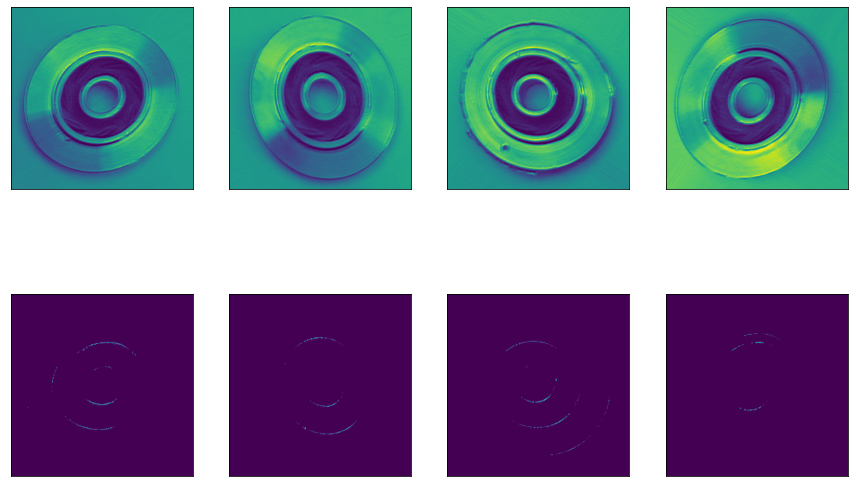

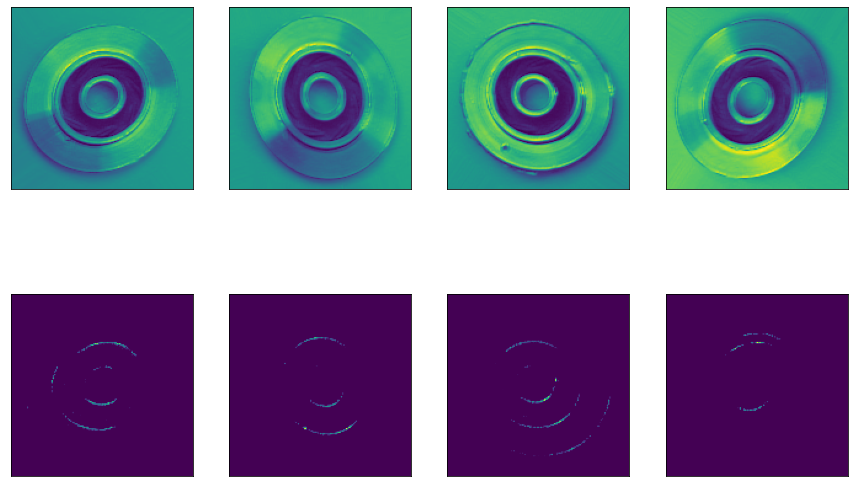

In [6]:
#get the conv layers
layerOutputs = [layer.output for layer in imageModel.layers[:2]]

#put layers into a model
activationModel = tf.keras.models.Model(inputs=imageModel.input, outputs=layerOutputs)

nfig=4
nfilt=2

images = imagesTest[:nfig]
activations=activationModel.predict(images)

#first layer
c=nfig+1
plt.figure(figsize=(15,15))
for i in range(nfilt):
    for j in range(nfig):
        plt.subplot(nfilt+1,nfig,c)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(activations[0][j, :, :, i], cmap='viridis')
        c+=1
plt.show()

#second layer
c=nfig+1
plt.figure(figsize=(15,15))
for i in range(nfilt):
    for j in range(nfig):
        plt.subplot(nfilt+1,nfig,c)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(activations[1][j, :, :, i], cmap='viridis')
        c+=1
plt.show()